In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### DATASET 1

In [10]:
df = pd.read_csv('Ifood_new.csv')

In [11]:
print("Step 1: Basic DataFrame Exploration")

Step 1: Basic DataFrame Exploration


In [12]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


In [13]:
df.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
250,Vada,"Urad dal, ginger, curry leaves, green chilies,...",vegetarian,15.0,20.0,spicy,snack,NaN,South,https://www.archanaskitchen.com/images/archana...
251,Veg Kolhapuri,"Gobi, potato, beans, khus khus, coconut",vegetarian,20.0,30.0,spicy,main course,Maharashtra,West,https://www.vegrecipesofindia.com/wp-content/u...
252,Vegetable jalfrezi,"Baby corn, french beans, garam masala, ginger,...",vegetarian,10.0,30.0,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
253,Vindaloo,"Chicken, coconut oil, wine vinegar, ginger, gr...",non vegetarian,10.0,40.0,spicy,main course,Goa,West,https://upload.wikimedia.org/wikipedia/commons...
254,Zunka,"Gram flour, mustard, garlic, turmeric, red chilli",vegetarian,10.0,25.0,spicy,main course,Maharashtra,West,https://www.whiskaffair.com/wp-content/uploads...


In [14]:
df.shape

(255, 10)

In [15]:
df.dtypes

name               object
ingredients        object
diet               object
prep_time         float64
cook_time         float64
flavor_profile     object
course             object
state              object
region             object
img_url            object
dtype: object

In [16]:
print(df.columns)

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'img_url'],
      dtype='object')


In [17]:
print("\nStep 2: Summary Statistics of Numeric Columns")
df.describe()


Step 2: Summary Statistics of Numeric Columns


,prep_time,cook_time
count,225.000000,227.000000
mean,35.386667,38.911894
std,76.241081,49.421711
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


In [18]:
df.state.value_counts()

Gujarat            35
Punjab             33
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Odisha              7
Kerala              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Madhya Pradesh      2
Manipur             2
Jammu & Kashmir     2
Tripura             1
NCT of Delhi        1
Haryana             1
Nagaland            1
Chhattisgarh        1
Uttarakhand         1
Name: state, dtype: int64

In [19]:
df.region.value_counts()

West          73
South         58
North         50
East          32
North East    25
Central        3
Name: region, dtype: int64

In [20]:
df.diet.value_counts()

vegetarian        227
non vegetarian     28
Name: diet, dtype: int64

In [21]:
df.flavor_profile.value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

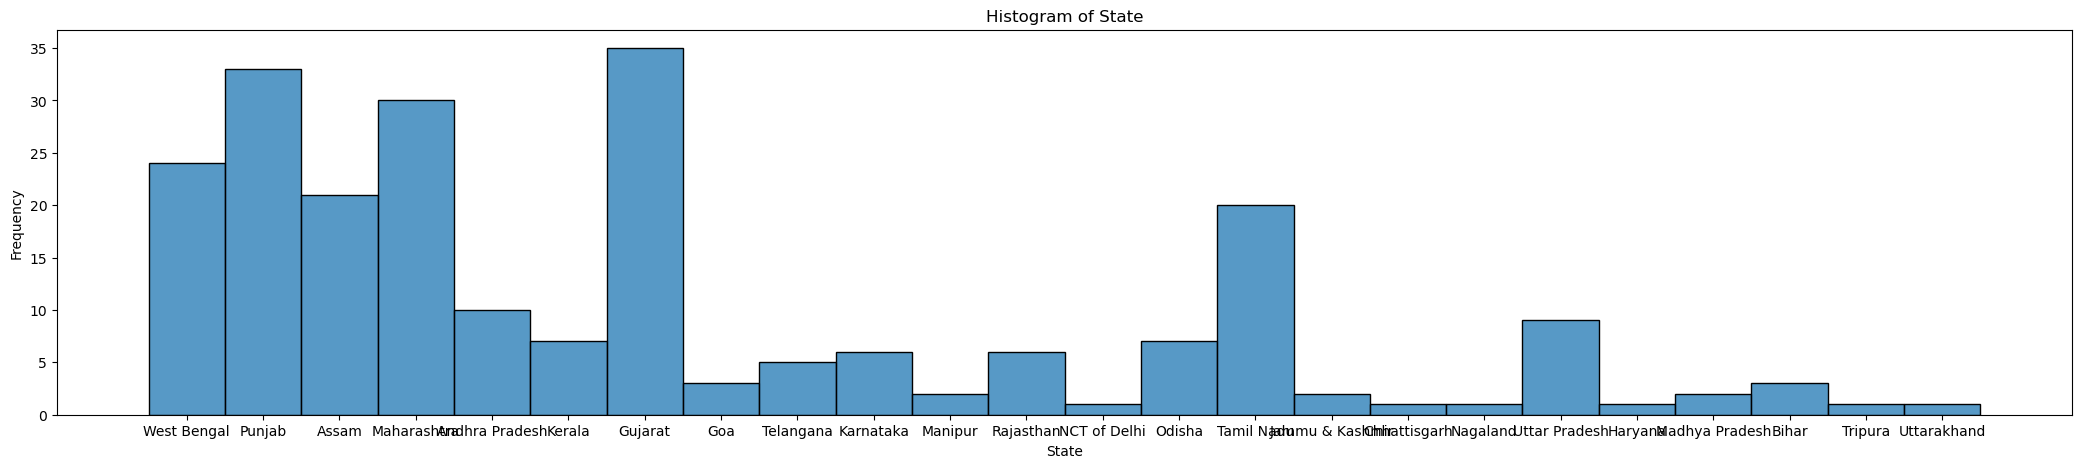

In [22]:
plt.figure(figsize=(26, 5))
sns.histplot(df['state'], bins=20)
plt.title('Histogram of State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

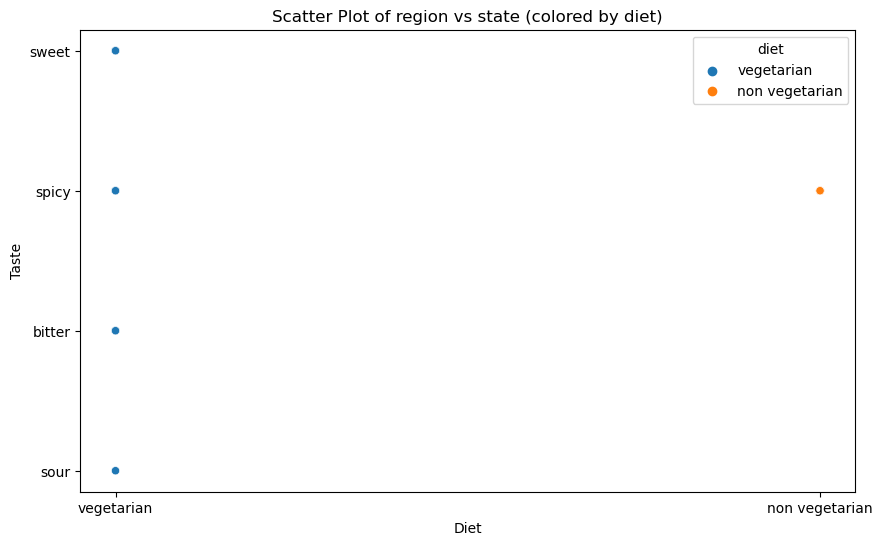

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diet', y='flavor_profile', hue='diet', data=df)
plt.title('Scatter Plot of region vs state (colored by diet)')
plt.xlabel('Diet')
plt.ylabel('Taste')
plt.legend(title='diet')
plt.show()

In [24]:
#From the histogram we can see that Gujrat has a big number of consumers, compared to the other states in the histogram.
#From the scatter plot we can see the classification of vegetarian and non-vegetarian.
#We can conclude that there are almost no non-vegetarian dishes which are'nt anything but spicy

In [25]:

df = df.drop(columns=['name', 'img_url'])

In [26]:
df.shape

(255, 8)

In [27]:
df = df.dropna()

In [28]:
df_num = df.select_dtypes(include='number')
df_num.head()

,prep_time,cook_time
0,10.0,50.0
1,10.0,20.0
2,5.0,40.0
3,10.0,40.0
4,10.0,40.0


In [29]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
lower_bound

prep_time   -5.0
cook_time   -5.0
dtype: float64

In [31]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [32]:
df.shape

(153, 8)

<Axes: xlabel='prep_time'>

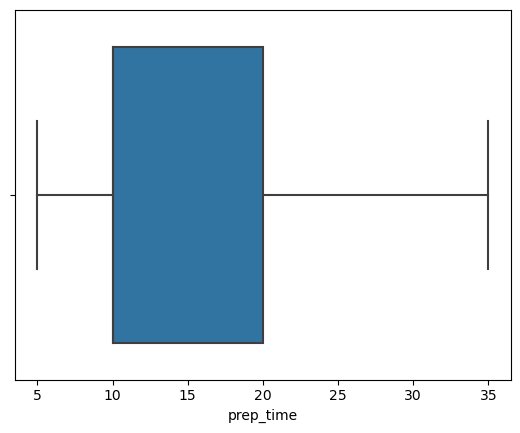

In [33]:
sns.boxplot(x=df['prep_time'])

In [34]:
df_num = df.select_dtypes('number')
df_num.shape

(153, 2)

In [35]:
X = df.drop('prep_time', axis=1)
y = df.prep_time
X.head()

,ingredients,diet,cook_time,flavor_profile,course,state,region
0,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,50.0,sweet,dessert,West Bengal,East
1,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,20.0,spicy,main course,Punjab,North
2,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,40.0,spicy,main course,Punjab,North
3,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,40.0,bitter,main course,Punjab,North
4,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,40.0,spicy,main course,Punjab,North


In [36]:
X_num = X.select_dtypes('number')
X_num.head()

,cook_time
0,50.0
1,20.0
2,40.0
3,40.0
4,40.0


In [37]:
X_cat = X.select_dtypes('object')
X_cat.head()

,ingredients,diet,flavor_profile,course,state,region
0,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,sweet,dessert,West Bengal,East
1,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,spicy,main course,Punjab,North
2,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,spicy,main course,Punjab,North
3,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,bitter,main course,Punjab,North
4,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,spicy,main course,Punjab,North


In [38]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [39]:
type(X_num_scaled)

numpy.ndarray

In [161]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [162]:
X_num_scaled.describe()

,cook_time
count,153.000000
mean,0.410458
std,0.197732
min,0.000000
25%,0.285714
50%,0.357143
75%,0.500000
max,1.000000


In [163]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [164]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [165]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((153, 190), (153, 1), (153, 189))

In [166]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
cook_time                                                                                0
ingredients_Aloo, urad dal, mustard, ginger, curry leaves                                0
ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili    0
ingredients_Apricots, sugar syrup                                                        0
ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                    0
                                                                                        ..
region_East                                                                              0
region_North                                                                             0
region_North East                                                                        0
region_South                                                                             0
region_West                             

In [167]:
X.describe()

,cook_time,"ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup","ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli","ingredients_Baby corn, french beans, garam masala, ginger, carrot","ingredients_Baby potatoes, garam masala, cashew nuts, kasuri methi, tomatoes","ingredients_Baking soda, clarified butter, oil, all purpose flour","ingredients_Beaten rice flakes, potato, curry leaves, green chilies, lemon juice","ingredients_Beef, coconut, garam masala, curry leaves, green chilies, chili powder",...,state_Telangana,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,region_Central,region_East,region_North,region_North East,region_South,region_West
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.410458,0.006536,0.006536,0.006536,0.013072,0.006536,0.006536,0.006536,0.006536,0.006536,...,0.026144,0.052288,0.006536,0.084967,0.019608,0.124183,0.261438,0.058824,0.183007,0.352941
std,0.197732,0.080845,0.080845,0.080845,0.113956,0.080845,0.080845,0.080845,0.080845,0.080845,...,0.160087,0.223337,0.080845,0.279749,0.139104,0.330873,0.440861,0.236067,0.387942,0.479454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(122, 190)
(31, 190)
(122,)
(31,)


In [ ]:
#Almost all the dishes have similar prep-time.
#Spicy food is the highest

### DATASET 2

In [40]:
df = pd.read_csv('Inequality in Education.csv')

In [41]:
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [42]:
df.tail()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
190,WSM,Samoa,High,EAP,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.02996,7.02996
191,YEM,Yemen,Low,AS,183.0,48.09012,48.09012,48.09012,46.13765,46.13765,46.13765,46.13765,46.13765,46.13765,46.13765,46.13765,46.13765
192,ZAF,South Africa,High,SSA,109.0,NaN,NaN,16.06077,16.06077,16.06077,14.26559,17.29413,17.29413,17.29413,17.29413,17.29413,17.29413
193,ZMB,Zambia,Medium,SSA,154.0,23.76000,23.76000,23.76000,23.76000,21.73491,21.73491,21.73491,21.73491,20.43572,20.43572,20.43572,20.43572
194,ZWE,Zimbabwe,Medium,SSA,146.0,17.82500,17.82500,17.82500,17.82500,17.39521,16.80576,16.80576,16.80576,16.80576,14.60503,14.60503,14.60503


In [43]:
df.shape

(195, 17)

In [44]:
df.dtypes

ISO3                               object
Country                            object
Human Development Groups           object
UNDP Developing Regions            object
HDI Rank (2021)                   float64
Inequality in Education (2010)    float64
Inequality in Education (2011)    float64
Inequality in Education (2012)    float64
Inequality in Education (2013)    float64
Inequality in Education (2014)    float64
Inequality in Education (2015)    float64
Inequality in Education (2016)    float64
Inequality in Education (2017)    float64
Inequality in Education (2018)    float64
Inequality in Education (2019)    float64
Inequality in Education (2020)    float64
Inequality in Education (2021)    float64
dtype: object

In [45]:
print(df.columns)

Index(['ISO3', 'Country', 'Human Development Groups',
       'UNDP Developing Regions', 'HDI Rank (2021)',
       'Inequality in Education (2010)', 'Inequality in Education (2011)',
       'Inequality in Education (2012)', 'Inequality in Education (2013)',
       'Inequality in Education (2014)', 'Inequality in Education (2015)',
       'Inequality in Education (2016)', 'Inequality in Education (2017)',
       'Inequality in Education (2018)', 'Inequality in Education (2019)',
       'Inequality in Education (2020)', 'Inequality in Education (2021)'],
      dtype='object')


In [46]:
df.describe()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
count,191.000000,137.000000,150.000000,157.000000,165.000000,168.000000,168.000000,168.000000,168.000000,172.000000,174.000000,176.000000,176.000000
mean,95.811518,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.853851,18.649140,18.396401,18.212993,18.006314,18.006314
std,55.307333,14.392552,14.342499,14.305732,14.470344,14.350759,14.475000,14.479261,14.558072,14.546446,14.553003,14.569313,14.569313
min,1.000000,1.322970,1.385640,1.390450,0.779397,0.765510,0.757375,0.724854,0.724854,0.550110,0.550110,0.550110,0.550110
25%,48.500000,6.917102,6.119250,6.011760,5.605950,6.127907,6.209205,6.130745,5.591175,5.854422,5.618515,5.518733,5.518733
50%,96.000000,17.825000,17.312742,16.421150,16.060770,15.957630,15.344075,14.461598,14.292875,13.565415,13.263530,12.843558,12.843558
75%,143.500000,30.542861,30.176057,30.201410,30.542861,30.564901,29.686837,29.647365,29.647365,29.326065,29.303075,28.335352,28.335352
max,191.000000,48.723000,48.723000,48.723000,49.321290,49.321290,49.321290,49.321290,49.321290,50.124110,50.124110,50.124110,50.124110


In [47]:
df.ISO3.value_counts()

AFG    1
QAT    1
MYS    1
NAM    1
NER    1
      ..
GNQ    1
GRC    1
GRD    1
GTM    1
ZWE    1
Name: ISO3, Length: 195, dtype: int64

In [48]:
df.Country.value_counts()

Afghanistan          1
Qatar                1
Malaysia             1
Namibia              1
Niger                1
                    ..
Equatorial Guinea    1
Greece               1
Grenada              1
Guatemala            1
Zimbabwe             1
Name: Country, Length: 195, dtype: int64

In [49]:
df['Human Development Groups'].value_counts()

Very High    66
High         49
Medium       44
Low          32
Name: Human Development Groups, dtype: int64

In [50]:
df['UNDP Developing Regions'].value_counts()

SSA    46
LAC    33
EAP    26
AS     20
ECA    17
SA      9
Name: UNDP Developing Regions, dtype: int64

<Axes: xlabel='Country', ylabel='HDI Rank (2021)'>

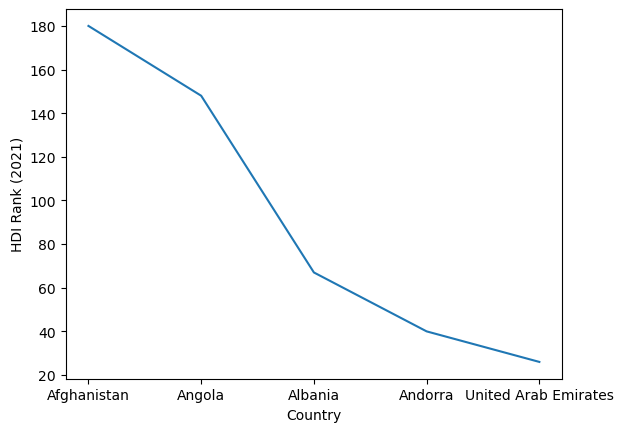

In [51]:
sns.lineplot(x=df.Country.head(), y='HDI Rank (2021)', data=df, errorbar=None)

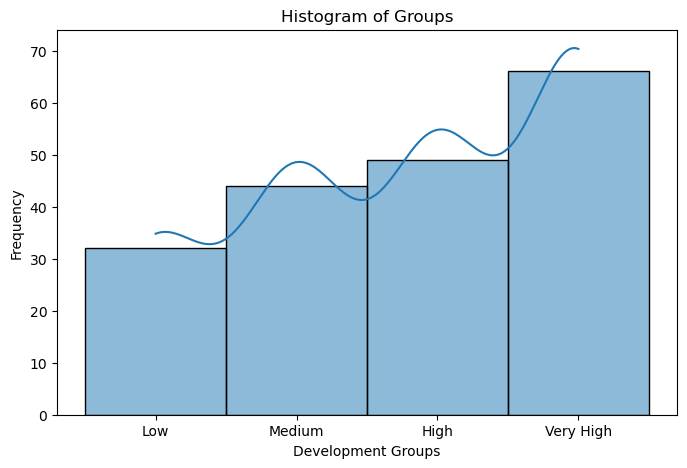

In [52]:
plt.figure(figsize = (8,5))
sns.histplot(df['Human Development Groups'],kde = True)
plt.title('Histogram of Groups')
plt.xlabel('Development Groups')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The line graph shows the HDI Rank for the year 2021
#Afghanistan has the highest HDI
#Developmet Groups describes how much countries have developed over the year
#The number of Very High Development Groups is more

In [53]:
df = df.drop(columns=['ISO3','Inequality in Education (2011)','Inequality in Education (2010)'])

In [54]:
df.shape

(195, 14)

In [322]:
df = df.dropna()

In [323]:
df.shape

(112, 14)

In [324]:
df_num = df.select_dtypes(include='number')
df_num.head()

,HDI Rank (2021),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,180.0,44.823380,44.82338,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
2,67.0,11.900000,11.90000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
5,47.0,6.430560,6.51336,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,85.0,3.685000,3.68500,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
10,91.0,3.702155,3.51567,3.491246,3.537645,3.549497,3.565062,3.565062,3.565062,3.565062,3.565062


In [325]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [326]:
lower_bound

HDI Rank (2021)                  -33.250000
Inequality in Education (2012)   -19.468298
Inequality in Education (2013)   -20.573531
Inequality in Education (2014)   -21.032022
Inequality in Education (2015)   -25.027658
Inequality in Education (2016)   -23.319138
Inequality in Education (2017)   -23.656210
Inequality in Education (2018)   -23.679646
Inequality in Education (2019)   -24.290499
Inequality in Education (2020)   -24.290499
Inequality in Education (2021)   -24.290499
dtype: float64

In [327]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [328]:
df.shape

(112, 14)

<Axes: xlabel='HDI Rank (2021)'>

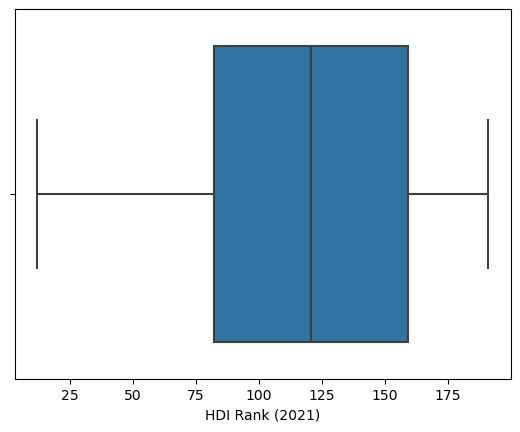

In [331]:
sns.boxplot(x=df['HDI Rank (2021)'])

In [332]:
df_num = df.select_dtypes('number')
df_num.shape

(112, 11)

In [334]:
X = df.drop('HDI Rank (2021)', axis=1)
y = df['HDI Rank (2021)']
X.head()

,Country,Human Development Groups,UNDP Developing Regions,Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,Afghanistan,Low,SA,44.823380,44.82338,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
2,Albania,High,ECA,11.900000,11.90000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
5,Argentina,Very High,LAC,6.430560,6.51336,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,Armenia,High,ECA,3.685000,3.68500,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
10,Azerbaijan,High,ECA,3.702155,3.51567,3.491246,3.537645,3.549497,3.565062,3.565062,3.565062,3.565062,3.565062


In [335]:
X_num = X.select_dtypes('number')
X_num.head()

,Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,44.823380,44.82338,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
2,11.900000,11.90000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
5,6.430560,6.51336,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,3.685000,3.68500,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
10,3.702155,3.51567,3.491246,3.537645,3.549497,3.565062,3.565062,3.565062,3.565062,3.565062


In [336]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Country,Human Development Groups,UNDP Developing Regions
0,Afghanistan,Low,SA
2,Albania,High,ECA
5,Argentina,Very High,LAC
6,Armenia,High,ECA
10,Azerbaijan,High,ECA


In [337]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [338]:
type(X_num_scaled)

numpy.ndarray

In [339]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [340]:
X_num_scaled.describe()

,Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.466165,0.465566,0.466227,0.461676,0.457718,0.451541,0.430745,0.429930,0.429457,0.429457
std,0.300205,0.301861,0.301912,0.303842,0.301814,0.305000,0.293513,0.294505,0.295238,0.295238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224897,0.217490,0.219414,0.202586,0.205431,0.200316,0.191093,0.191027,0.191027,0.191027
50%,0.413014,0.428398,0.421478,0.420943,0.424007,0.420943,0.396444,0.393283,0.393283,0.393283
75%,0.708000,0.715245,0.717962,0.744719,0.718882,0.720843,0.686488,0.694941,0.694941,0.694941
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int) 

In [342]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [343]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((112, 132), (112, 10), (112, 122))

In [344]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Inequality in Education (2012)    0
Inequality in Education (2013)    0
Inequality in Education (2014)    0
Inequality in Education (2015)    0
Inequality in Education (2016)    0
                                 ..
UNDP Developing Regions_EAP       0
UNDP Developing Regions_ECA       0
UNDP Developing Regions_LAC       0
UNDP Developing Regions_SA        0
UNDP Developing Regions_SSA       0
Length: 132, dtype: int64
0
(112, 132)
(112,)


In [345]:
X.describe()

,Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),...,Human Development Groups_High,Human Development Groups_Low,Human Development Groups_Medium,Human Development Groups_Very High,UNDP Developing Regions_AS,UNDP Developing Regions_EAP,UNDP Developing Regions_ECA,UNDP Developing Regions_LAC,UNDP Developing Regions_SA,UNDP Developing Regions_SSA
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.466165,0.465566,0.466227,0.461676,0.457718,0.451541,0.430745,0.429930,0.429457,0.429457,...,0.285714,0.250000,0.294643,0.169643,0.107143,0.116071,0.125000,0.232143,0.071429,0.348214
std,0.300205,0.301861,0.301912,0.303842,0.301814,0.305000,0.293513,0.294505,0.295238,0.295238,...,0.453784,0.434959,0.457931,0.377006,0.310685,0.321750,0.332205,0.424097,0.258697,0.478545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224897,0.217490,0.219414,0.202586,0.205431,0.200316,0.191093,0.191027,0.191027,0.191027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.413014,0.428398,0.421478,0.420943,0.424007,0.420943,0.396444,0.393283,0.393283,0.393283,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.708000,0.715245,0.717962,0.744719,0.718882,0.720843,0.686488,0.694941,0.694941,0.694941,...,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [347]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(89, 132)
(23, 132)
(89,)
(23,)


In [ ]:
#The above calculations show how the HDI of coutries has changed over the period of 10 years.
#There is no much difference in the HDI Ranks

In [ ]:
---------------------------------------------------------------------------------------------------------------------------------

### DATASET 3

In [55]:
df = pd.read_csv('Supply chain.csv')

In [56]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1447296447,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808.0,14.30
1,1447158015,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188.0,87.94
2,1447138899,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331.0,61.20
3,1447363528,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847.0,16.16
4,1447363981,5/26/2013,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163.0,52.34


In [57]:
df.tail()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
12866,PLANT15,PORT08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12867,PLANT16,PORT09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12868,PLANT17,PORT10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12869,PLANT18,PORT11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12870,PLANT19,PORT04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.shape

(12871, 14)

In [59]:
df.dtypes

Order ID                 object
Order Date               object
Origin Port              object
Carrier                  object
TPT                      object
Service Level            object
Ship ahead day count     object
Ship Late Day count      object
Customer                 object
Product ID               object
Plant Code               object
Destination Port         object
Unit quantity           float64
Weight                  float64
dtype: object

In [60]:
df.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [61]:
df.describe()

,Unit quantity,Weight
count,9215.000000,9215.000000
mean,3202.747151,19.871688
std,15965.622260,66.569064
min,235.000000,0.000000
25%,330.000000,1.407430
50%,477.000000,4.440000
75%,1275.500000,13.325673
max,561847.000000,2338.405126


In [62]:
df['Ship Late Day count'].value_counts()

0           9023
1            110
3             78
 $0.08        48
 $0.10        38
            ... 
 $4.56         1
 $11.49        1
 $12.40        1
 $8.31         1
 $7.91         1
Name: Ship Late Day count, Length: 618, dtype: int64

In [63]:
df['Origin Port'].value_counts()

PORT04          9041
PORT09          1713
PORT05             1
dest_port_cd       1
Name: Origin Port, dtype: int64

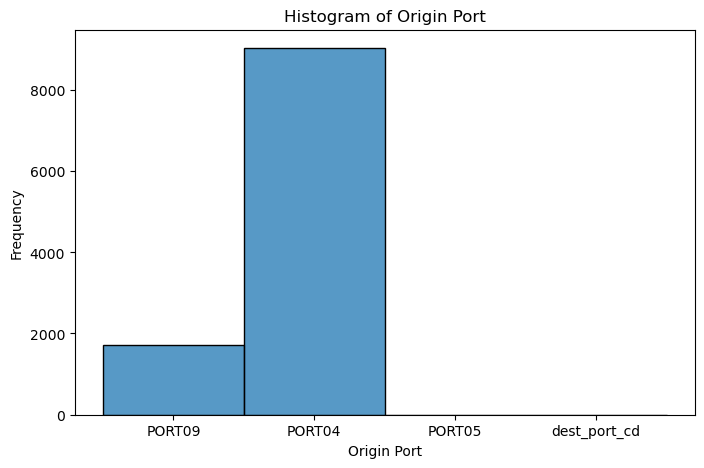

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Origin Port'])
plt.title('Histogram of Origin Port')
plt.xlabel('Origin Port')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Many suppliers use port 04

In [65]:
df = df.drop(columns=['Order ID', 'Order Date'])

In [66]:
df.shape

(12871, 12)

In [18]:
df = df.dropna()

In [19]:
df.shape

(9215, 12)

In [20]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Unit quantity,Weight
0,808.0,14.30
1,3188.0,87.94
2,2331.0,61.20
3,847.0,16.16
4,2163.0,52.34


In [21]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
lower_bound

Unit quantity   -1088.250000
Weight            -16.469935
dtype: float64

In [23]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [24]:
df.shape

(7209, 12)

<Axes: xlabel='Unit quantity'>

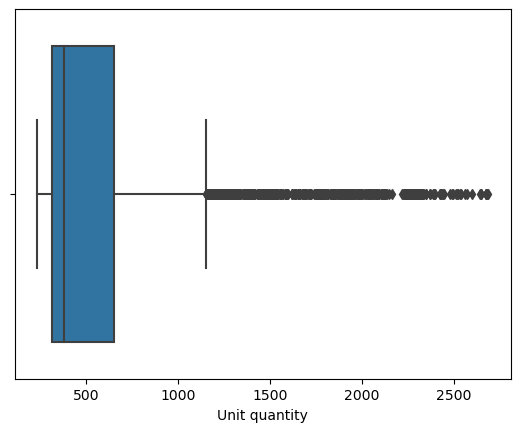

In [25]:
sns.boxplot(x=df['Unit quantity'])

In [26]:
df_num = df.select_dtypes('number')
df_num.shape

(7209, 2)

In [27]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
upper_bound

Unit quantity    1151.000000
Weight             15.478243
dtype: float64

In [29]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [30]:
df.shape

(5798, 12)

<Axes: xlabel='Unit quantity'>

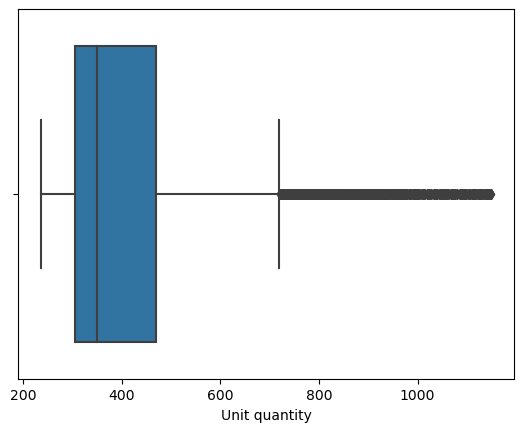

In [31]:
sns.boxplot(x=df['Unit quantity'])

In [32]:
df_num = df.select_dtypes('number')
df_num.shape

(5798, 2)

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
upper_bound

Unit quantity    1151.000000
Weight             15.478243
dtype: float64

In [34]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [35]:
df.shape

(5798, 12)

<Axes: xlabel='Unit quantity'>

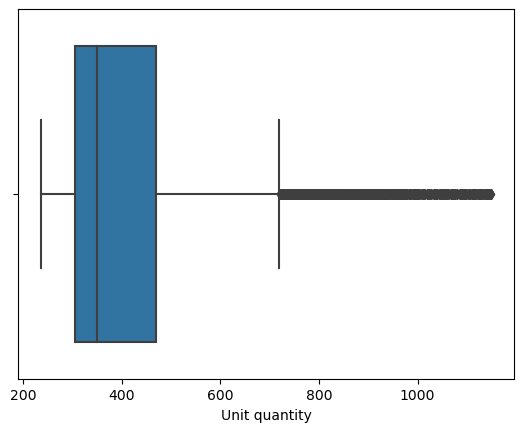

In [36]:
sns.boxplot(x=df['Unit quantity'])

In [39]:
X = df.drop('Unit quantity', axis=1)
y = df['Unit quantity']
X.head()

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Weight
0,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,14.30
7,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2.86
11,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,14.30
13,PORT09,V44_3,1,CRF,3,0,V55555_53,1697884,PLANT16,PORT09,7.80
31,PORT09,V44_3,1,CRF,3,0,V55555_53,1699336,PLANT16,PORT09,13.36


In [40]:
X_num = X.select_dtypes('number')
X_num.head()

,Weight
0,14.30
7,2.86
11,14.30
13,7.80
31,13.36


In [41]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port
0,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09
7,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09
11,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09
13,PORT09,V44_3,1,CRF,3,0,V55555_53,1697884,PLANT16,PORT09
31,PORT09,V44_3,1,CRF,3,0,V55555_53,1699336,PLANT16,PORT09


In [42]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [43]:
type(X_num_scaled)

numpy.ndarray

In [44]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [45]:
X_num_scaled.describe()

,Weight
count,5798.000000
mean,0.218886
std,0.225486
min,0.000000
25%,0.049255
50%,0.138497
75%,0.299793
max,1.000000


In [46]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [47]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [48]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((5798, 635), (5798, 1), (5798, 634))

In [49]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Weight                     0
Origin Port_PORT04         0
Origin Port_PORT05         0
Origin Port_PORT09         0
Carrier_V444_0             0
                          ..
Plant Code_PLANT08         0
Plant Code_PLANT12         0
Plant Code_PLANT13         0
Plant Code_PLANT16         0
Destination Port_PORT09    0
Length: 635, dtype: int64
0
(5798, 635)
(5798,)


In [50]:
X.describe()

,Weight,Origin Port_PORT04,Origin Port_PORT05,Origin Port_PORT09,Carrier_V444_0,Carrier_V444_1,Carrier_V44_3,TPT_0,TPT_1,TPT_2,...,Product ID_1701406,Product ID_1701972,Product ID_1702224,Plant Code_PLANT03,Plant Code_PLANT04,Plant Code_PLANT08,Plant Code_PLANT12,Plant Code_PLANT13,Plant Code_PLANT16,Destination Port_PORT09
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,...,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.0
mean,0.218886,0.994308,0.000172,0.005519,0.701104,0.251638,0.047258,0.012073,0.244567,0.739738,...,0.001035,0.000172,0.000172,0.947913,0.000172,0.004829,0.033632,0.007934,0.005519,1.0
std,0.225486,0.075234,0.013133,0.074092,0.457814,0.433992,0.212208,0.109222,0.429867,0.438815,...,0.032155,0.013133,0.013133,0.222222,0.013133,0.069331,0.180296,0.088725,0.074092,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.049255,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.138497,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.299793,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(4638, 635)
(1160, 635)
(4638,)
(1160,)


In [ ]:
#The number of units shipped every time varies a lot.
#A lot of variation in the number of units.

In [ ]:
---------------------------------------------------------------------------------------------------------------------------------

### DATASET 4

In [103]:
df = pd.read_csv('University Ranking.csv')

In [104]:
df.head()

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,...,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0


In [105]:
df.tail()

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
162,University of Cincinnati,201885,OH,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,University of Mississippi,176017,MS,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Ohio University,204857,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,University of Arkansas,106397,AR,NaN,NaN,NaN,153.0,147.0,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Washington State University,236939,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df.shape

(167, 41)

In [107]:
df.dtypes

University Name     object
IPEDS ID             int64
State               object
2023               float64
2022               float64
2021               float64
2020               float64
2019               float64
2018               float64
2017               float64
2016               float64
2015               float64
2014               float64
2013               float64
2012               float64
2011               float64
2010               float64
2009               float64
2008               float64
2007               float64
2006               float64
2005               float64
2004               float64
2003               float64
2002               float64
2001               float64
2000               float64
1999               float64
1998               float64
1997               float64
1996               float64
1995               float64
1994               float64
1993               float64
1992               float64
1991               float64
1990               float64
1

In [108]:
df.describe()

,IPEDS ID,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
count,167.000000,150.000000,161.000000,52.000000,123.000000,123.000000,123.000000,123.000000,123.000000,125.000000,...,25.000000,26.000000,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,10.000000,14.000000
mean,173743.532934,72.866667,77.931677,25.730769,65.365854,62.796748,62.073171,62.040650,61.447154,62.688000,...,12.960000,13.461538,12.920000,12.920000,12.960000,12.960000,13.000000,13.269231,5.300000,7.285714
std,46095.455853,41.787360,44.827743,14.717091,41.482224,38.415536,37.132720,37.188355,36.530069,37.358856,...,7.362518,7.585411,7.432586,7.370663,7.356856,7.368175,7.359801,7.581861,3.056868,3.988996
min,100663.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,132211.500000,38.000000,38.000000,13.750000,29.000000,30.000000,31.000000,31.500000,31.000000,32.000000,...,7.000000,7.250000,7.000000,7.000000,7.000000,7.000000,7.000000,7.250000,2.500000,4.250000
50%,174914.000000,72.000000,79.000000,26.000000,62.000000,63.000000,61.000000,60.000000,61.000000,62.000000,...,12.000000,13.500000,13.000000,13.000000,13.000000,13.000000,13.000000,12.500000,5.500000,7.500000
75%,204826.500000,105.000000,117.000000,39.000000,97.000000,89.000000,92.000000,92.000000,89.000000,95.000000,...,19.000000,19.750000,19.000000,19.000000,19.000000,19.000000,19.000000,19.750000,7.000000,10.000000
max,445188.000000,137.000000,148.000000,49.000000,166.000000,147.000000,133.000000,135.000000,135.000000,145.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,10.000000,13.000000


In [109]:
df.columns

Index(['University Name', 'IPEDS ID', 'State', '2023', '2022', '2021', '2020',
       '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993',
       '1992', '1991', '1990', '1989', '1988', '1986', '1984'],
      dtype='object')

In [110]:
df.State.value_counts()

CA    22
NY    16
MA    11
PA    10
TX     7
NJ     7
IL     7
DC     6
OH     6
FL     5
NC     5
CO     4
WA     4
AL     4
CT     4
VA     4
MI     3
MD     3
GA     3
IN     3
IA     3
MZ     2
AZ     2
NE     2
OK     2
UT     2
WI     2
SC     2
MN     2
TN     2
NH     2
DE     1
LA     1
OR     1
MO     1
RI     1
VT     1
KS     1
KY     1
MS     1
AR     1
Name: State, dtype: int64

In [111]:
df['University Name'].value_counts()

Princeton University                1
University of Oregon                1
Drexel University                   1
Miami University                    1
Saint Louis University              1
                                   ..
University of Miami                 1
University of Maryland              1
University of Washington            1
Rutgers University-New Brunswick    1
Washington State University         1
Name: University Name, Length: 167, dtype: int64

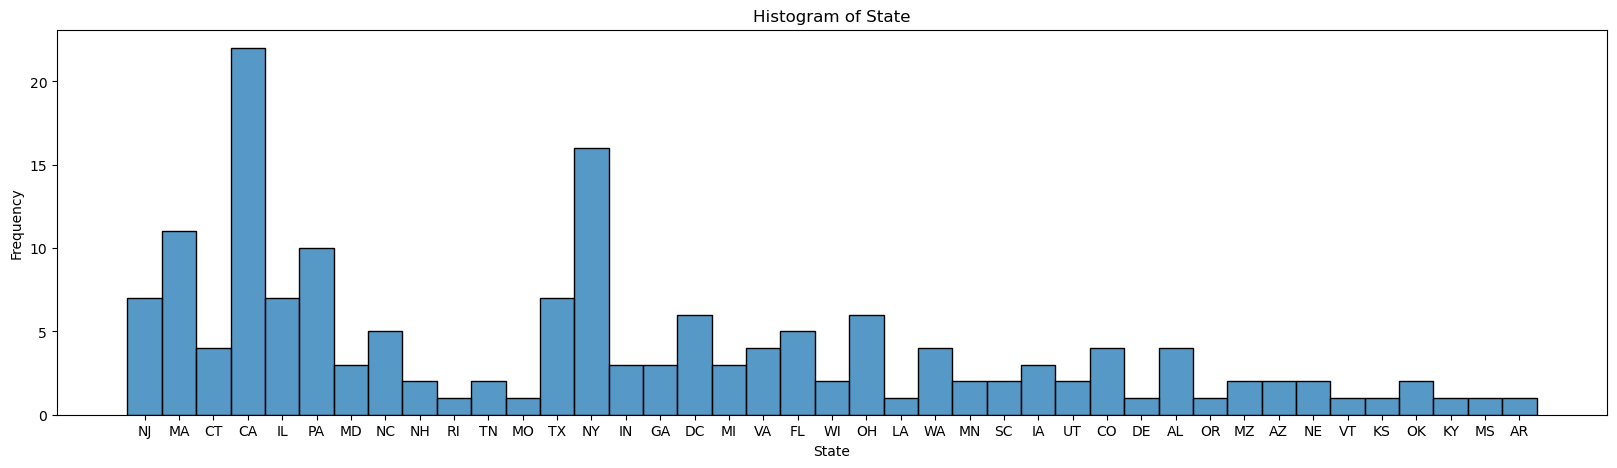

In [112]:
plt.figure(figsize=(20, 5))
sns.histplot(df['State'], bins=20)
plt.title('Histogram of State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='2023', ylabel='State'>

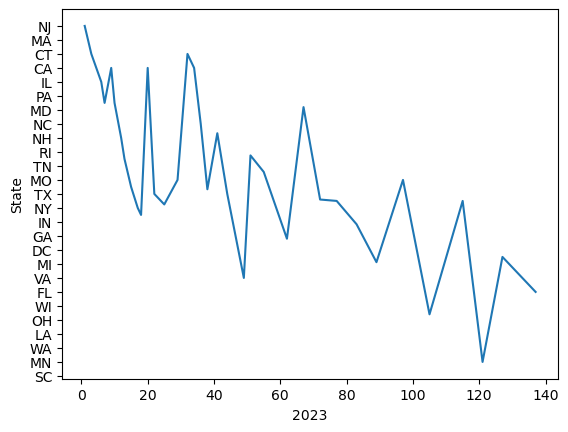

In [113]:
sns.lineplot(x='2023', y='State', data=df, errorbar=None)

In [ ]:
#From the histogram we can infer that most of the universities that are ranked higher are from California.
#After California, New York is the next State with high ranking universities according to the histogram.
#According to the line plot in 2023 florida has the lowest ranking university.


In [114]:
df = df.drop(columns=['IPEDS ID', '1984', '1986', '1988', '1989', '1990', '1991', '1992', '1993','1994','1995', '1996', '1997','1998', '1999', '2000', '2001','2002','2003'])

In [115]:
df.shape

(167, 22)

In [116]:
df = df.dropna()

In [117]:
df.shape

(48, 22)

In [118]:
df_num = df.select_dtypes(include='number')
df_num.head()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0
2,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
3,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0


In [119]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [120]:
lower_bound

2023   -22.125
2022   -24.000
2021   -20.625
2020   -24.375
2019   -22.500
2018   -24.625
2017   -24.375
2016   -24.375
2015   -22.500
2014   -24.375
2013   -22.500
2012   -22.500
2011   -21.375
2010   -22.500
2009   -22.500
2008   -22.500
2007   -21.000
2006   -20.250
2005   -22.000
2004   -22.000
dtype: float64

In [121]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [122]:
df.shape

(48, 22)

<Axes: xlabel='2022'>

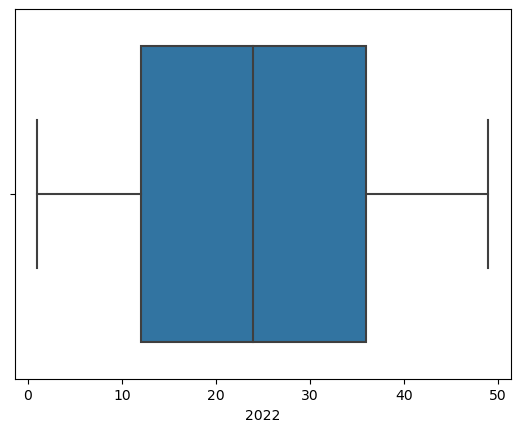

In [123]:
sns.boxplot(x=df['2022'])

In [124]:
df_num = df.select_dtypes('number')
df_num.shape

(48, 20)

In [139]:
X = df.drop('University Name', axis=1)
y = df['University Name']
X.head()

,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,...,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0
2,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
3,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,...,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0


In [140]:
X_num = X.select_dtypes('number')
X_num.head()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0
2,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
3,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0


In [141]:
X_cat = X.select_dtypes('object')
X_cat.head()

,State
0,NJ
1,MA
2,MA
3,CT
4,CA


In [142]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [143]:
type(X_num_scaled)

numpy.ndarray

In [144]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [145]:
X_num_scaled.describe()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.427855,0.471788,0.478733,0.472789,0.446314,0.425758,0.426136,0.455882,0.447720,0.419643,0.444182,0.413377,0.453526,0.410088,0.426894,0.441038,0.440252,0.434799,0.453431,0.449119
std,0.266291,0.290985,0.289872,0.292710,0.280621,0.272271,0.269260,0.282137,0.283106,0.270039,0.280180,0.266555,0.284737,0.259452,0.267401,0.272552,0.273791,0.272781,0.279811,0.281168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217593,0.229167,0.244792,0.224490,0.211538,0.181818,0.200000,0.215686,0.221698,0.196429,0.221698,0.206140,0.225962,0.192982,0.200000,0.207547,0.207547,0.217593,0.225490,0.221154
50%,0.416667,0.479167,0.479167,0.479592,0.432692,0.400000,0.418182,0.431373,0.433962,0.392857,0.433962,0.403509,0.442308,0.403509,0.418182,0.433962,0.433962,0.425926,0.441176,0.442308
75%,0.648148,0.729167,0.708333,0.719388,0.653846,0.613636,0.640909,0.691176,0.665094,0.629464,0.665094,0.618421,0.663462,0.596491,0.618182,0.641509,0.622642,0.625000,0.676471,0.663462
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [147]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [148]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((48, 43), (48, 20), (48, 23))

In [149]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
2023        0
2022        0
2021        0
2020        0
2019        0
2018        0
2017        0
2016        0
2015        0
2014        0
2013        0
2012        0
2011        0
2010        0
2009        0
2008        0
2007        0
2006        0
2005        0
2004        0
State_CA    0
State_CT    0
State_DC    0
State_FL    0
State_GA    0
State_IL    0
State_IN    0
State_LA    0
State_MA    0
State_MD    0
State_MI    0
State_MO    0
State_NC    0
State_NH    0
State_NJ    0
State_NY    0
State_OH    0
State_PA    0
State_RI    0
State_TN    0
State_TX    0
State_VA    0
State_WI    0
dtype: int64
0
(48, 43)
(48,)


In [150]:
X.describe()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,State_NH,State_NJ,State_NY,State_OH,State_PA,State_RI,State_TN,State_TX,State_VA,State_WI
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.427855,0.471788,0.478733,0.472789,0.446314,0.425758,0.426136,0.455882,0.447720,0.419643,...,0.020833,0.020833,0.083333,0.020833,0.062500,0.020833,0.020833,0.041667,0.041667,0.020833
std,0.266291,0.290985,0.289872,0.292710,0.280621,0.272271,0.269260,0.282137,0.283106,0.270039,...,0.144338,0.144338,0.279310,0.144338,0.244623,0.144338,0.144338,0.201941,0.201941,0.144338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217593,0.229167,0.244792,0.224490,0.211538,0.181818,0.200000,0.215686,0.221698,0.196429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.416667,0.479167,0.479167,0.479592,0.432692,0.400000,0.418182,0.431373,0.433962,0.392857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.648148,0.729167,0.708333,0.719388,0.653846,0.613636,0.640909,0.691176,0.665094,0.629464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(38, 43)
(10, 43)
(38,)
(10,)


In [ ]:
#The above observations are made over a period of 20 years.
#It is to predict the rank of Universities.


In [ ]:
---------------------------------------------------------------------------------------------------------------------------------

### DATASET 5

In [153]:
df = pd.read_csv('Mall_Customers.csv')

In [154]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [155]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [156]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [157]:
df.shape

(200, 5)

In [158]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [159]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [160]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

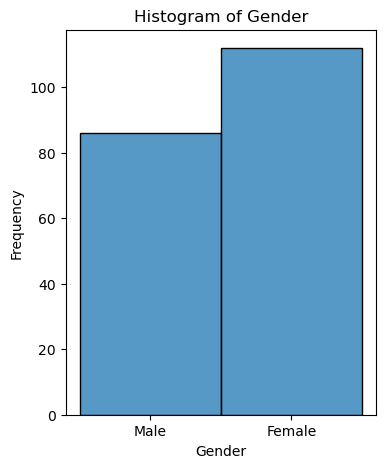

In [188]:
plt.figure(figsize=(4, 5))
sns.histplot(df['Gender'])
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

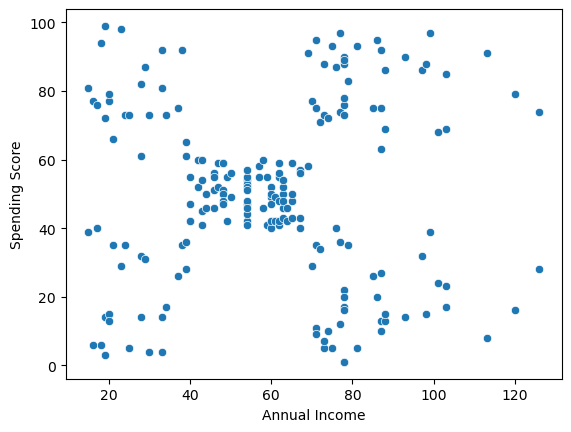

In [189]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
#The number of female shoppers is higher.
#Compared to Males the mall has more customers who are Female.
#People whose Annual Income ranges between 40 - 70 have a spending score of >=40


In [163]:
df = df.drop(columns=['CustomerID'])

In [164]:
df.shape

(200, 4)

In [165]:
df = df.dropna()

In [166]:
df.shape

(200, 4)

In [167]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [168]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [169]:
lower_bound

Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [170]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [171]:
df.shape

(198, 4)

<Axes: xlabel='Age'>

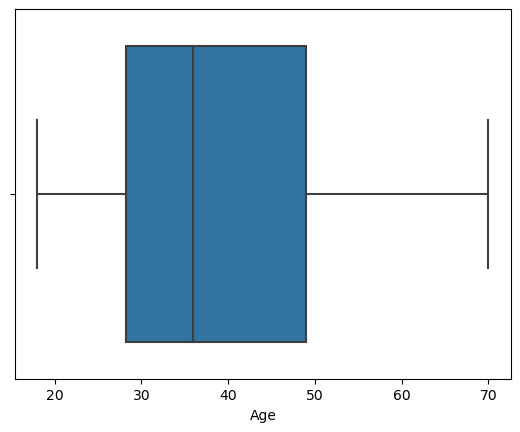

In [207]:
sns.boxplot(x=df['Age'])

In [191]:
df_num = df.select_dtypes('number')
df_num.shape

(198, 3)

In [208]:
X = df.drop('Age', axis=1)
y = df['Age']
X.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40


In [209]:
X_num = X.select_dtypes('number')
X_num.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [210]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [211]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [212]:
type(X_num_scaled)

numpy.ndarray

In [213]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [214]:
X_num_scaled.describe()

,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000
mean,0.403494,0.502010
std,0.227363,0.262723
min,0.000000,0.000000
25%,0.229730,0.346939
50%,0.414414,0.500000
75%,0.565315,0.732143
max,1.000000,1.000000


In [215]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int) 

In [216]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [217]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((198, 4), (198, 2), (198, 2))

In [218]:
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64
0
(198, 4)
(198,)


In [219]:
X.describe()

,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
count,198.000000,198.000000,198.000000,198.000000
mean,0.403494,0.502010,0.565657,0.434343
std,0.227363,0.262723,0.496927,0.496927
min,0.000000,0.000000,0.000000,0.000000
25%,0.229730,0.346939,0.000000,0.000000
50%,0.414414,0.500000,1.000000,0.000000
75%,0.565315,0.732143,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(158, 4)
(40, 4)
(158,)
(40,)


In [ ]:
#The above code is fed into the model to get age of the customer as the output.
#All of the customers that are listed in the file are adults.